# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import scale

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [29]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




# 1. Análisis exploratorio del conjunto de datos.

In [30]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info['% vacios'] = df_info['vacios']/len(df)
df_info

,columna,unicos,vacios,% vacios
0,id,569,0,0.0
1,diagnosis,2,0,0.0
2,radius_mean,456,0,0.0
3,texture_mean,479,0,0.0
4,perimeter_mean,522,0,0.0
5,area_mean,539,0,0.0
6,smoothness_mean,474,0,0.0
7,compactness_mean,537,0,0.0
8,concavity_mean,537,0,0.0
9,concave points_mean,542,0,0.0


In [31]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

# 2. Normalizar las variables numéricas con el método StandardScaler.

In [32]:
from sklearn.preprocessing import StandardScaler

df.set_index('id', inplace = True)
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
926682,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
926954,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409


In [33]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,1.108857e-15,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-7.706085e-01,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-7.706085e-01,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-7.706085e-01,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.297676e+00,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,1.297676e+00,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


# 3. Realizar un método de reducción de dimensionalidad visto en clases.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31']
)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.216917,0.216399,0.103599,0.224548,0.217965,0.137645,0.231504,0.251222,0.255266,0.133013,...,0.225590,0.105019,0.233642,0.221970,0.125301,0.204476,0.223075,0.246288,0.120663,0.126721
PC2,-0.077610,-0.226545,-0.058262,-0.207630,-0.223224,0.188760,0.158473,0.067868,-0.027220,0.193220,...,-0.212896,-0.045135,-0.192592,-0.211887,0.172476,0.147663,0.103088,-0.002433,0.142062,0.276449
PC3,-0.103826,0.002527,0.054751,0.001854,0.040151,-0.102835,-0.067146,0.010477,-0.017048,-0.040310,...,-0.037380,-0.052989,-0.038072,-0.001176,-0.261677,-0.231049,-0.167051,-0.162709,-0.272450,-0.232692
PC4,0.098083,-0.050448,0.599537,-0.051245,-0.061116,-0.150488,-0.040499,-0.027710,-0.070256,-0.059519,...,-0.024256,0.627598,-0.023544,-0.033893,-0.013843,0.074232,0.057160,-0.017570,0.034978,0.065305
PC5,-0.080783,0.041751,-0.020448,0.041566,0.014113,-0.367173,0.016980,0.089617,-0.041530,-0.304188,...,0.001558,-0.060711,0.013919,-0.021218,-0.319865,0.133701,0.197269,0.049157,-0.235644,0.102373
PC6,-0.012050,0.019239,-0.030018,0.017864,-0.001176,-0.284964,-0.013160,-0.009063,-0.051440,0.357697,...,0.000521,-0.047470,0.009377,-0.024072,-0.367792,0.048659,0.028636,-0.030438,0.500246,-0.079585
PC7,-0.146157,-0.113375,0.027502,-0.102689,-0.040115,-0.116836,0.049011,-0.095753,-0.136517,-0.076269,...,-0.002954,0.028407,0.008165,0.076971,-0.101091,0.146559,-0.055441,-0.160569,-0.018002,0.366420
PC8,0.182757,-0.026495,0.100374,-0.038649,0.013356,-0.309993,-0.169954,-0.091642,-0.166744,-0.247066,...,0.034180,0.014354,0.019613,0.066456,0.183575,0.077066,0.059216,-0.044375,0.218388,0.079321
PC9,0.000313,-0.223138,0.112614,-0.223768,-0.195631,0.006445,-0.167854,0.040571,-0.111962,0.256053,...,-0.112160,0.103298,-0.109637,-0.080771,0.112247,-0.100710,0.161875,0.060495,0.064585,-0.134133
PC10,-0.050214,0.099453,0.253798,0.091105,0.081497,-0.064997,0.021275,-0.128370,0.009735,0.572036,...,0.077559,0.035055,0.052315,0.073405,-0.122732,-0.166581,-0.305747,-0.079473,-0.027994,0.003144


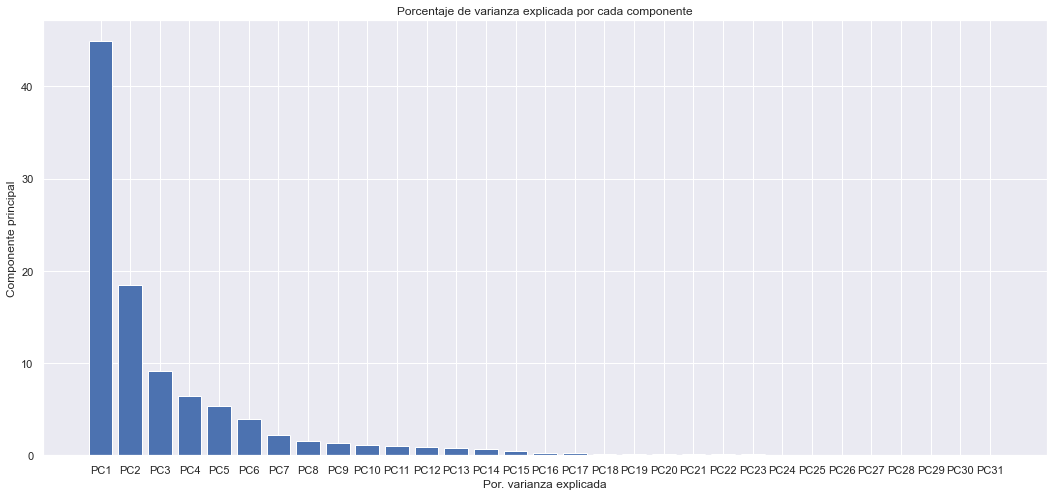

In [35]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31']

plt.figure(figsize=(18,8))
plt.bar(x= range(1,32), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

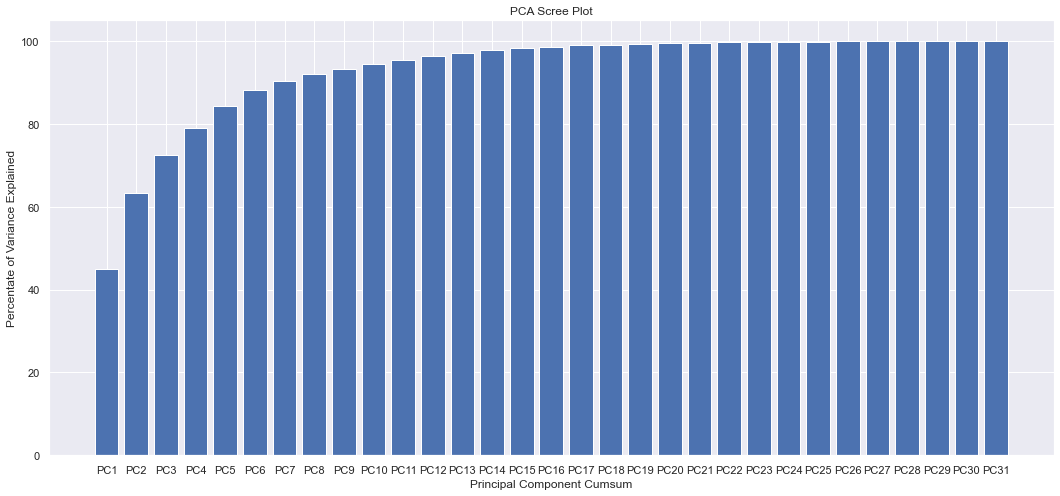

In [36]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31']


plt.figure(figsize=(18,8))
plt.bar(x= range(1,32), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [37]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecc = pca_pipe.transform(X=df)
proyecc = pd.DataFrame(
    proyecc,
    columns =['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20','PC21', 'PC22', 'PC23', 'PC24','PC25','PC26', 'PC27', 'PC28', 'PC29','PC30','PC31']
,
    index   = df.index
)
proyecc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
id,,,,,,,,,,,,,,,,,,,,,
842302,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194974,-0.315737,-0.156946,-0.889455,...,0.169643,0.081284,0.085396,-0.176795,-0.156546,-0.187547,-0.262048,-0.033109,0.043898,-0.046916
842517,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099645,0.385282,-0.711683,1.049263,...,-0.067161,-0.089242,-0.216010,0.008557,-0.171406,-0.043313,0.182637,0.031919,-0.003854,-0.002299
84300903,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660969,0.058983,0.024004,0.456603,...,0.215265,-0.051629,-0.073947,0.109567,0.175480,-0.005903,0.045610,0.047553,0.001533,0.001115
84348301,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748,1.380734,1.150379,-1.405498,-1.123232,...,0.262375,-0.195118,-0.125393,0.157425,0.082025,-0.290911,0.166242,0.042973,-0.071320,-0.019300
84358402,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073155,0.717646,-0.263770,0.354929,...,-0.081634,-0.022214,0.140422,-0.017348,0.001300,0.044767,0.037922,-0.035519,0.007297,0.020683


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA(n_components=11))
pca_pipe.fit(proyecc)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10','PC11']
)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,1.000000e+00,9.093933e-15,8.355288e-17,-2.624409e-17,1.095496e-17,-2.590789e-17,7.370370e-17,-5.242651e-17,1.050890e-16,2.597983e-17,...,1.490036e-13,-8.527758e-14,-8.217452e-14,-6.575203e-15,8.388753e-15,1.346256e-16,-3.799320e-17,-3.323444e-18,7.719543e-17,6.221487e-17
PC2,-9.092163e-15,1.000000e+00,8.740896e-16,-3.836713e-16,5.038700e-16,1.389833e-16,1.953009e-18,-2.198503e-16,2.979797e-16,-1.338954e-16,...,4.367378e-12,-2.011483e-12,-2.587366e-12,1.077439e-13,2.381284e-13,1.081576e-14,-6.551746e-16,-6.371432e-17,-2.974050e-17,-5.693968e-21
PC3,-8.265105e-17,-9.991997e-16,1.000000e+00,1.097829e-15,-9.910497e-17,8.414561e-18,7.229724e-16,3.082443e-15,-3.895923e-15,3.351169e-15,...,-5.979415e-11,8.106865e-12,5.788516e-11,4.883234e-12,3.275392e-12,-1.187238e-13,3.451837e-14,6.675485e-17,1.532060e-17,-8.226010e-17
PC4,2.618001e-17,4.071357e-16,-1.159767e-15,1.000000e+00,1.639513e-15,-2.919381e-15,-1.791613e-14,-5.309534e-14,6.273692e-14,-3.183292e-14,...,9.523119e-10,-5.555568e-10,-2.997981e-10,-2.233367e-11,5.494443e-11,2.281816e-13,-5.053257e-13,1.699520e-16,5.089255e-17,1.670943e-16
PC5,-1.091059e-17,-5.215120e-16,9.274384e-17,-2.503383e-15,1.000000e+00,2.573520e-14,1.495285e-13,4.278284e-13,-5.734970e-13,3.530769e-13,...,-6.248812e-09,4.356365e-09,4.200247e-09,4.582091e-10,-2.271370e-10,-5.696126e-12,5.132196e-12,-2.794784e-15,-1.365549e-16,-3.823013e-17
PC6,2.590243e-17,-1.367167e-16,-8.188004e-18,2.545233e-15,-2.529353e-14,1.000000e+00,-4.001972e-13,-9.842515e-13,1.302292e-12,-8.507777e-13,...,1.217467e-08,-7.505944e-09,-9.873976e-09,-1.504249e-09,4.162292e-10,3.636900e-12,-1.271085e-11,5.307241e-15,2.265490e-16,1.189234e-18
PC7,-7.379042e-17,-4.516055e-18,-6.874162e-16,1.757535e-14,-1.458916e-13,3.932649e-13,1.000000e+00,-4.154737e-11,4.078681e-11,-2.155149e-11,...,2.950934e-07,-1.361853e-07,-1.642616e-07,-9.156690e-09,1.325911e-08,4.480998e-10,-1.409235e-10,5.176823e-14,1.106933e-15,-1.337865e-16
PC8,5.202349e-17,2.085031e-16,-2.937592e-15,5.057802e-14,-4.094689e-13,9.484438e-13,4.078606e-11,1.000000e+00,6.534528e-10,-1.912381e-10,...,1.199323e-06,-1.222855e-06,-7.232498e-07,-1.393353e-07,6.845701e-08,1.051178e-11,-1.222316e-09,5.282611e-13,4.454945e-14,6.388140e-17
PC9,-1.044787e-16,-2.811840e-16,3.672604e-15,-5.922839e-14,5.442578e-13,-1.244475e-12,-3.966120e-11,-6.469209e-10,1.000000e+00,7.265051e-10,...,-1.469920e-06,2.462428e-06,1.806434e-06,3.938853e-07,9.263867e-08,-2.047293e-09,1.500895e-09,-1.549059e-12,-8.952223e-14,2.134086e-16
PC10,-2.641102e-17,1.213175e-16,-3.126760e-15,2.981034e-14,-3.318647e-13,8.052010e-13,2.072504e-11,1.869907e-10,-7.174145e-10,1.000000e+00,...,9.545741e-07,-7.792468e-07,-2.846936e-06,-3.595156e-07,-1.561482e-07,1.045032e-08,-1.998678e-09,2.239337e-12,4.734646e-14,1.337265e-18


In [39]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca_proyectado.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11']

plt.figure(figsize=(18,8))
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca_proyectado.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

NameError: name 'modelo_pca_proyectado' is not defined

In [40]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10','PC11'],
    index   = df.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
id,,,,,,,,,,,
842302,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652875,2.532476,2.217509,2.255769
842517,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487071,-0.023844,0.548144,0.001390,-0.868632
84300903,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363479,2.037232,0.939681,-0.397998
84348301,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915895,1.451712,2.867380,4.910908
84358402,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539341,1.371014,1.428491,-0.009563,-0.562429


In [41]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df.columns,
                    index   = df.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df.head())

------------------
Valores originales
------------------


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652875,2.532476,2.217509,...,0.000031,-0.000015,-0.000014,-7.964178e-07,2.178526e-06,2.527181e-08,-2.180429e-08,9.018521e-12,3.451516e-13,7.703607e-16
842517,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487071,-0.023844,0.548144,0.001390,...,-0.000012,0.000007,0.000005,4.544011e-07,-7.532105e-07,-3.566487e-09,7.657498e-09,-3.357352e-12,-1.836744e-13,4.739360e-16
84300903,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363479,2.037232,0.939681,...,-0.000005,0.000005,0.000002,3.692345e-07,-2.148354e-07,5.109850e-09,2.439005e-09,-1.404872e-12,-1.366612e-13,6.185276e-16
84348301,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915895,1.451712,2.867380,...,0.000066,-0.000035,-0.000029,-2.057878e-06,4.359136e-06,4.114386e-08,-4.441305e-08,1.931039e-11,8.463621e-13,1.230792e-16
84358402,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539341,1.371014,1.428491,-0.009563,...,-0.000007,0.000006,0.000004,5.188612e-07,-2.801211e-07,-4.219069e-09,4.767521e-09,-3.080948e-12,-1.526756e-13,7.079961e-16


---------------------
Valores reconstruidos
---------------------


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# cargar datos
df2 = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df2['diagnosis'] = df2['diagnosis'] .replace({'M':1,'B':0}) # target 

Método 1: Logistic Regression

In [43]:
X = df2.drop(columns='diagnosis').values
Y = df2['diagnosis'].values

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

In [44]:
# Creando el modelo
rlog = LogisticRegression(solver='newton-cg', max_iter=2000)
rlog.fit(X_train, Y_train) # ajustando el modelo

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did 

C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\EstebanSaez\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did 

LogisticRegression(max_iter=2000, solver='newton-cg')

In [45]:
rlog.score(X_train,Y_train)

0.9494505494505494

In [46]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))

print('Valores:\n')
print('originales: ', y_true)
print('predicho:   ', y_pred)

Valores:

originales:  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
predicho:    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


In [47]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))


Matriz de confusion:
 
[[64  5]
 [ 3 42]]


In [48]:
# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'datos de pacientes'")
print("")
df_metrics


Metricas para los regresores : 'datos de pacientes'



,accuracy,recall,precision,fscore
0,0.9298,0.9304,0.9244,0.9271


En un principio se utilizó el solver ‘lbfgs’ pero daba métricas bajas prediciendo deficientemente, por lo que se optó por probar con el solver ‘newton-cg’. Este dio como resultado métricas mayores y predijo mejor.
Cabe mencionar que se le aumentó el número de iteraciones porque no convergía, a pesar de esto, el warning sigue apareciendo.

Método 2: MLPClassifier

In [49]:
from sklearn.neural_network import MLPClassifier

# Creando el modelo
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train) # ajustando el modelo

C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [50]:
clf.score(X_train,Y_train)

0.6329670329670329

In [51]:
y_true2 =  list(Y_test)
y_pred2 = list(clf.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true2,y_pred2))


Matriz de confusion:
 
[[69  0]
 [45  0]]


In [52]:
df_temp2 = pd.DataFrame(
    {
        'y':y_true2,
        'yhat':y_pred2
        }
)

df_metrics2 = summary_metrics(df_temp2)
print("\nMetricas para los regresores : ")
print("")
df_metrics2


Metricas para los regresores : 



C:\Users\EstebanSaez\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,fscore
0,0.6053,0.5,0.3026,0.377


A pesar de los varios intentos para mejorar las métricas, moviendo todos los hiperparámetros no se pudo obtener un mejor resultado.

Método 3: K-Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Creando el modelo
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train) # ajustando el modelo

KNeighborsClassifier(n_neighbors=1)

In [54]:
model.score(X_train,Y_train)

1.0

In [55]:
y_true3 =  list(Y_test)
y_pred3 = list(model.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true3,y_pred3))


Matriz de confusion:
 
[[64  5]
 [10 35]]


In [56]:
df_temp3 = pd.DataFrame(
    {
        'y':y_true3,
        'yhat':y_pred3
        }
)

df_metrics3 = summary_metrics(df_temp3)
print("\nMetricas para los regresores : ")
print("")
df_metrics3


Metricas para los regresores : 



,accuracy,recall,precision,fscore
0,0.8684,0.8527,0.8699,0.8593


Al igual que en el anterior modelo, se probó varios hiperparámetros, pero ninguno logró mejorar las métricas, ni siquiera probando con árbol de decisión.
Por otro lado, probé distintas vecindarios pero resultó que con 1 daba el mejor resultado.

Conclusiones:

A partir de los resultados obtenidos con estos 3 métodos de clasificación, se concluye que en este caso el mejor método esel logístico, ya que es el que mejor métricas arroja. Luego, el segundo mejor método es K-Nearest Neighbours ya que es el que le sigue en métricas al modelo logístico y finalmente el peor modelo viene siendo MLPClassifier ya que dio métricas bajas.